# Import the necessary libraries

In [30]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib  # For saving the model

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.shape

(768, 9)

In [22]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [20]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<ipython-input-10-566fac30a4c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


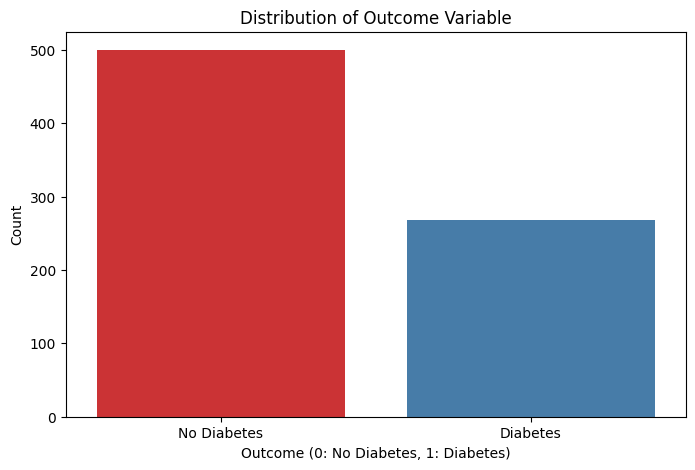

In [10]:
# Count the number of occurrences of each class
outcome_counts = df['Outcome'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

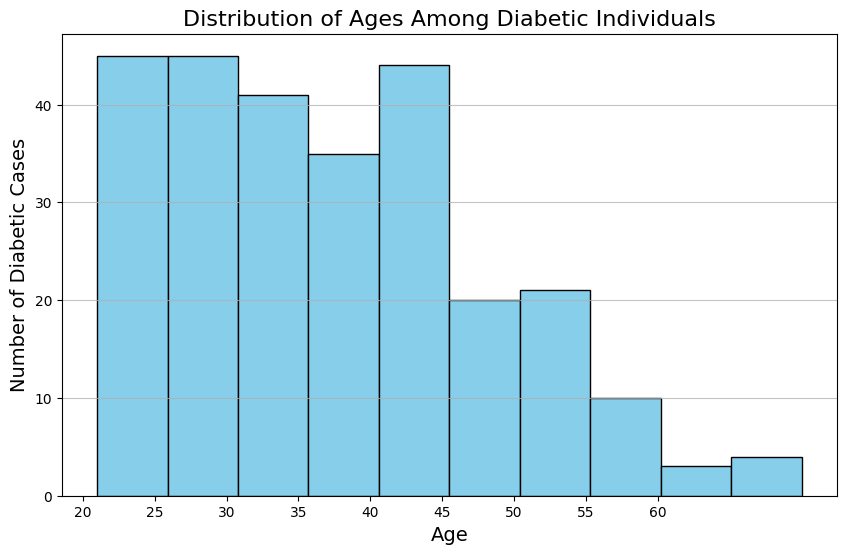

In [15]:
# Filter for diabetic individuals
diabetic_ages = df[df['Outcome'] == 1]['Age']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(diabetic_ages, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages Among Diabetic Individuals', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Diabetic Cases', fontsize=14)
plt.xticks(range(20, 61, 5))  # Adjusting x-ticks for clarity
plt.grid(axis='y', alpha=0.75)
plt.show()

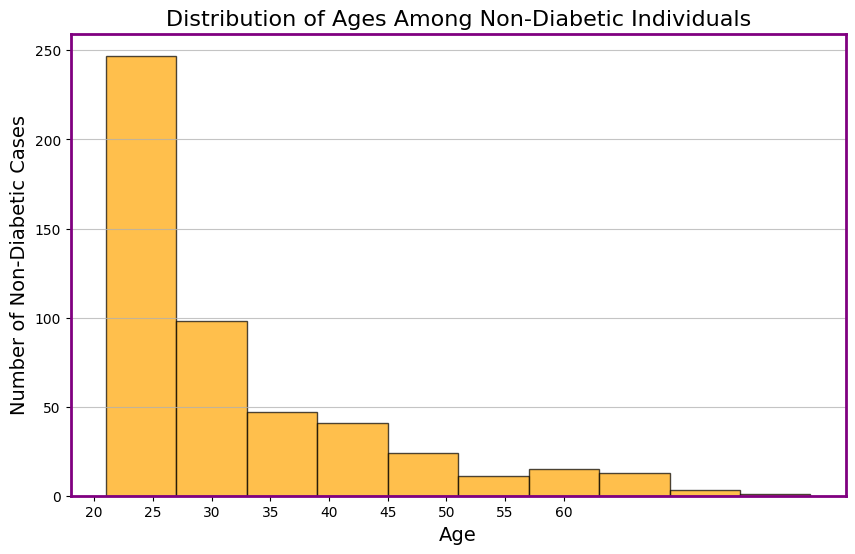

In [17]:
# Filter for non-diabetic individuals
non_diabetic_ages = df[df['Outcome'] == 0]['Age']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_diabetic_ages, bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ages Among Non-Diabetic Individuals', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Non-Diabetic Cases', fontsize=14)
plt.xticks(range(20, 61, 5))  # Adjusting x-ticks for clarity
plt.grid(axis='y', alpha=0.75)

# Adding colorful decoration
for spine in plt.gca().spines.values():
    spine.set_edgecolor('purple')
    spine.set_linewidth(2)

plt.show()

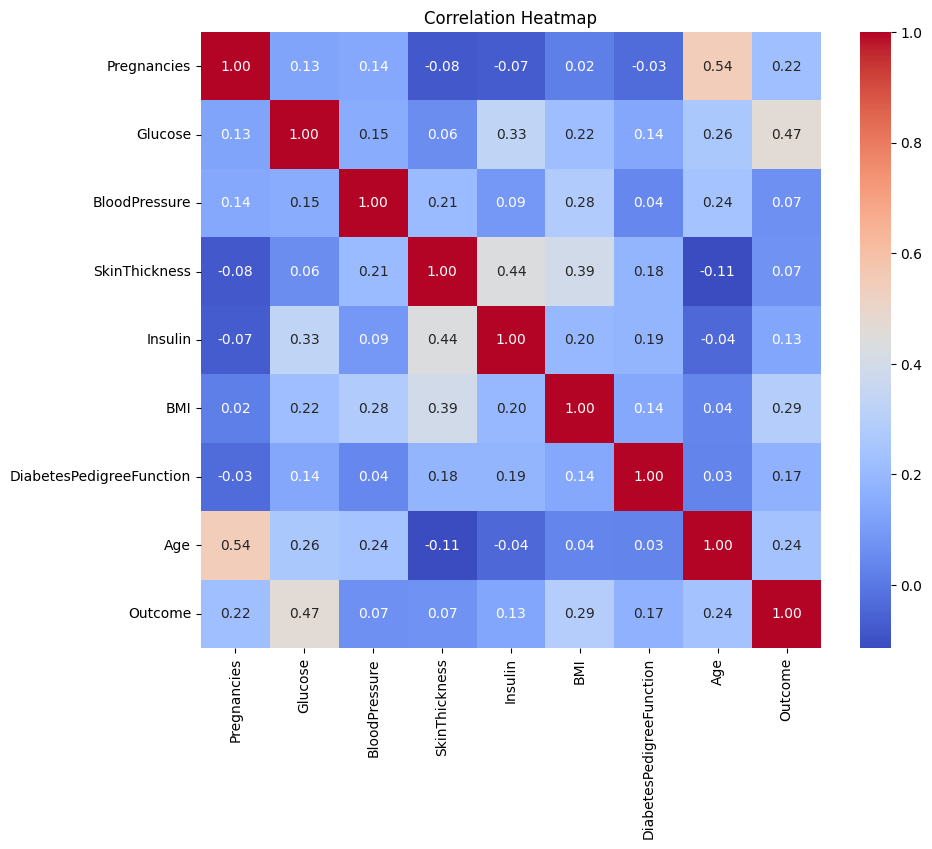

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [13]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print(correlation_matrix)


# Insights
the data is unbalanced
the non diabatic is larger than diabatic person

# Building the model

In [31]:
df2 = df.copy()  # Make a copy to work on

In [32]:
# 1. Splitting the data into features (X) and target (y)
X = df2.drop('Outcome', axis=1)  # Features
y = df2['Outcome']  # Target

In [33]:
# 2. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [34]:
# 3. Standardizing the features (this is important for models like Logistic Regression and SVM)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

In [35]:
# 4. Define individual models
log_reg = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gbm_model = GradientBoostingClassifier()
svm_model = SVC(probability=True)  # SVM with probability for soft voting


In [36]:
# 5. Voting Classifier (ensemble) with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('gbm', gbm_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Soft voting takes the probabilities into account
)

In [37]:
# 6. Cross-validation to evaluate the ensemble model
cv_scores = cross_val_score(voting_clf, X_resampled_scaled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:54:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:54:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:54:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Scores: [0.785 0.73  0.81  0.88  0.82 ]
Average Cross-Validation Score: 0.805


In [38]:
# 7. Fit the model on the training data
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:55:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('log_reg', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_ty...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gbm', GradientBoostingClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [39]:
# 8. Make predictions on the test data
y_pred = voting_clf.predict(X_test)

In [40]:
# 9. Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [41]:
# 10. Print results
print(f"\nEnsemble Model Accuracy: {accuracy}")
print(f"\nConfusion Matrix:\n {conf_matrix}")
print(f"\nClassification Report:\n {class_report}")


Ensemble Model Accuracy: 0.825

Confusion Matrix:
 [[74 25]
 [10 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        99
           1       0.78      0.90      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



# Saving the model

In [42]:
# 11. Save the trained model
joblib.dump(voting_clf, 'diabetes_model_sav')
print("Model saved as 'diabetes_model_sav'.")

Model saved as 'diabetes_model_sav'.


In [43]:
# 12. Save the scaler as well (since the input data needs to be scaled similarly when making predictions)
joblib.dump(scaler, 'scaler-diabetes_sav')
print("Scaler saved as 'scaler-diabetes_sav'.")

Scaler saved as 'scaler-diabetes_sav'.


# Make a predictive system

In [44]:
# 13. Predictive System (Example usage with new data)
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],  # This is the new input data
                     [1, 85, 66, 29, 0, 26.6, 0.351, 31]])

In [46]:
# Load the scaler and model (if they were saved and need to be reused)
loaded_scaler = joblib.load('scaler-diabetes_sav')
loaded_model = joblib.load('diabetes_model_sav')

In [47]:
# Scale the new data using the same scaler
new_data_scaled = loaded_scaler.transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# Predict using the loaded model
predictions = loaded_model.predict(new_data_scaled)

In [50]:
# Output the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for data point {i+1}: {'Diabetic' if prediction == 1 else 'Non-diabetic'}")

Prediction for data point 1: Diabetic
Prediction for data point 2: Non-diabetic
